# Feature finding and activity annotation

---

**Updated on:** 2023-12-22

> Authors: Simon Knoblauch (simon.knoblauch@student.uni-tuebingen.de)  
> Input file(s): centroided .mzML, .csv file from data preparation set
> Output file(s): .csv files containing activity peak data, feature table containing activity annotated features, Feature Quantification table and .mgf file for feature based molecular networking.

**Please read the comments before proceeding to run the code of each cell and let us know if you run into any errors or find undocumented pieces of code.**

In [1]:
import pyopenms as oms
import pandas as pd
import sys
sys.path.append(r"..")
import microspot_reader as msu
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import microspot_reader.plots as plots
from matplotlib import colors
import numpy as np
%matplotlib widget

2023-12-22 14:14:08.773 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-12-22 14:14:08.805 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-12-22 14:14:08.810 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-12-22 14:14:08.819 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-12-22 14:14:08.825 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-12-22 14:14:08.836 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


## Feature detection from .mzML file.

The feature detection workflow is based on pyopenms and uses parts of the untargeted metabolomics workflow found in their documentation. You can find more on this here: https://pyopenms.readthedocs.io/en/latest/user_guide/untargeted_metabolomics_preprocessing.html

Please input the path to your .mzML file in `mzmlfilename`. For feature finding the following arguments can be changed:
- `mass_error`: Mass error of the MS in ppm
- `noise_threshold:` threshold below which signals are considered noise
- `min_fwhm`: minimum full width at half maximum for feature peaks
- `max_fwhm`: maximum fwhm for feature peaks

Additionally the list of adducts being checked can be changed in the `msu.adduct_detector` function in line 20. For this please follow the guidelines for pyopenms.

In [6]:
mzmlfilename="../test_mzml/231004_TestAB_1.mzML"

exp = oms.MSExperiment()
oms.MzMLFile().load(mzmlfilename, exp)

fm=msu.feature_finding(
    exp=exp,
    filename=mzmlfilename,
    mass_error=10,
    noise_threshold=1e5,
    min_fwhm=1,
    max_fwhm=60
)

msu.ms2_mapping(
    exp=exp,
    fm=fm
)

ft,consensus_map=msu.adduct_detector(
    fm=fm,
    adduct_list=[
        b'H:+:0.4', 
        b'Na:+:0.2', 
        b'NH4:+:0.2', 
        b'H3O1:+:0.1', 
        b'CH2O2:+:0.1', 
        b"H-2O-1:0:0.2"
    ]
)

xics,spectra=msu.xic_generator(
    exp=exp,
    ft=ft
)

ft

Progress of 'mass trace detection':
-- done [took 7.97 s (CPU), 8.58 s (Wall)] -- 
Progress of 'elution peak detection':
-- done [took 0.44 s (CPU), 0.06 s (Wall)] -- 
Progress of 'assembling mass traces to features':
-- done [took 0.31 s (CPU), 0.04 s (Wall)] -- 
Unassigned peptides: 0
Peptides assigned to exactly one feature: 0
Peptides assigned to multiple features: 0
Unassigned and unidentified precursors: 2154
Unidentified precursor assigned to exactly one feature: 0
Unidentified precursor assigned to multiple features: 0
Feature annotation with identifications:
    no ID: 134
    single ID: 0
    multiple IDs (identical): 0
    multiple IDs (divergent): 0


Adding neutral: ---------- Adduct -----------------
Charge: 0
Amount: 1
MassSingle: -18.0106
Formula: H-2O-1
log P: -1.60944

MassExplainer table size: 938
Generating Masses with threshold: -6.90776 ...
done
46 of 698 valid net charge compomer results did not pass the feature charge constraints
Inferring edges raised edge coun

,charge,RT,mz,RTstart,RTend,MZstart,MZend,quality,intensity,adduct
feature_id,,,,,,,,,,
4434920204712248944,3,66.709224,388.468027,64.374726,85.729362,388.465607,389.138245,0.000443,24186778.0,H3
3591487352946394154,3,67.913730,150.768212,64.942854,85.729362,150.768082,151.102859,0.000309,24854486.0,H3
4449655127439253683,2,67.913730,306.684185,64.942854,86.747238,306.683350,307.186554,0.000353,25665592.0,H2
17656561466341703412,2,67.913730,391.132227,65.570604,84.818988,391.130951,391.635071,0.000167,10729629.0,H2
8527786824367363522,3,68.554974,160.112047,63.663474,87.363738,160.112000,160.781265,0.001772,143574000.0,H3
...,...,...,...,...,...,...,...,...,...,...
1824169827924148287,1,241.742562,494.130137,239.490684,281.990580,494.128357,495.133667,0.000543,40091324.0,H1
12685016132740778265,1,241.742562,965.408884,236.065812,274.571826,965.406616,966.413513,0.000721,37795088.0,H1
9973349792534296857,1,243.879312,204.135465,74.719104,275.160582,204.134781,205.140030,0.000175,15587993.0,H1


## Saving of files for feature based molecular networking

Here all files for feature based molecular networking are saved. They will be saved in the same folder as the notebook. If you want to specify an output folder please add the follwing string before the filenames of each file: `"<output-folder_path>/"`.

In [7]:
filtered_map=oms.ConsensusMap(consensus_map)
filtered_map.clear(False)
for feature in consensus_map:
    if feature.getPeptideIdentifications():
        filtered_map.push_back(feature)

consensusXML_file = "filtered.consensusXML"
oms.ConsensusXMLFile().store(consensusXML_file, filtered_map)

# for FFBM
oms.GNPSMGFFile().store(
    oms.String(consensusXML_file),
    [mzmlfilename.encode()],
    oms.String("MS2data.mgf"),
)
oms.GNPSQuantificationFile().store(consensus_map, "FeatureQuantificationTable.txt")


## 2d Plot of the LC MS experiment

Taken from https://pyopenms.readthedocs.io/en/latest/user_guide/ms_data.html

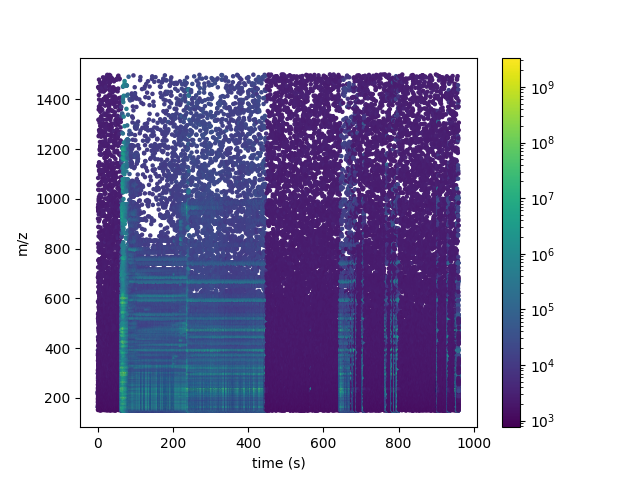

In [8]:
def plot_spectra_2D(exp, ms_level=1, marker_size=5):
    exp.updateRanges()
    for spec in exp:
        if spec.getMSLevel() == ms_level:
            mz, intensity = spec.get_peaks()
            p = intensity.argsort()  # sort by intensity to plot highest on top
            rt = np.full([mz.shape[0]], spec.getRT(), float)
            plt.scatter(
                rt,
                mz[p],
                c=intensity[p],
                cmap="viridis",
                s=marker_size,
                norm=colors.LogNorm(
                    exp.getMinIntensity() + 1, exp.getMaxIntensity()
                ),
            )
    plt.clim(exp.getMinIntensity() + 1, exp.getMaxIntensity())
    plt.xlabel("time (s)")
    plt.ylabel("m/z")
    plt.colorbar()
    plt.show()  # slow for larger data sets

plot_spectra_2D(exp)

## Peakdetection in Activity Chromatogram

The peak detection in the activity chromatogram occurs in the 2d heatmap instead of the 1d chromatogram to avoid counting visual artifacts from the assay as individual peaks.

For this first load the .csv file from the data preparation step by specifying the filepath in line 2.

In a second step the baseline noise is automatically estimated with the `msu.baseline_noise` function. Here you can specify a convergence criterium for baseline estimation. The lower the value is the smaller the resulting standard deviation will be and therefore also the peak threshold given by the `pk_threshold` variable. Alternatively you can specify the peak threshold manually by replacing the right part of the equation in line 10 with the desired value.

,peak_idx,RT,start_idx,end_idx,RTstart,RTend,max_int,AUC
peak_nr,,,,,,,,
0,7,68.0,2,12,63.0,73.0,1.338950,7.175401
1,178,239.0,175,179,236.0,240.0,0.044267,0.093907


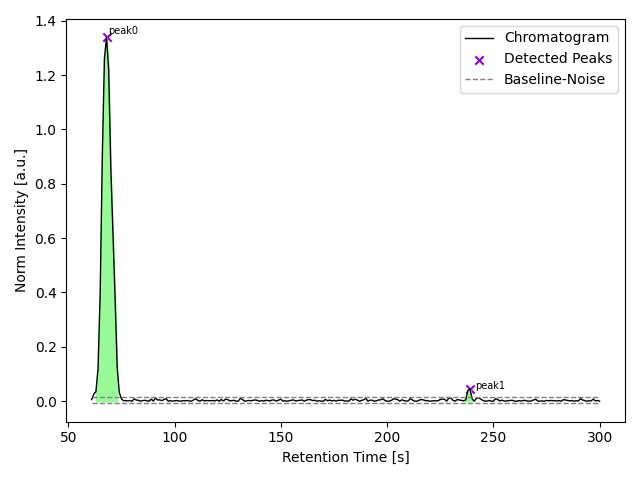

In [40]:
at=pd.read_csv(
    "../output/output_concat.csv",
    index_col=0)
at.sort_values("RT",inplace=True)

stdev,mn=msu.baseline_noise(
    at.smoothed_int,
    convergence_criteria=0.002
)
pk_threshold=mn+3*stdev

aft=msu.img_peak_detection(
    df=at,
    threshold=pk_threshold,
    datacolumn_name="smoothed_int"
)

fig,ax=plt.subplots()
plots.plot_activity_chromatogram(
    figure=fig,
    axs=ax,
    spot_df=at,
    peak_df=aft,
    ydata_name="smoothed_int",
    peak_threshold=pk_threshold
)



aft

### Heatmap containing peak data

if Halo detection was performed please change the `halo` argument in line 14 to `True`.

In [ ]:
# Dictionaries to convert Row-Letters into Row-Numbers and vice versa (required for heatmap)
row_conv={"abcdefghijklmnopqrstuvwxyz"[i-1]: i for i in range(1,27)}
row_conv_inv={v:k for k,v in row_conv.items()}

fig,ax=plt.subplots()
# Plotting heatmap to showcase the detected peaks in 2d, as it might be easier to understand why only those have been detected
plots.plot_heatmapv2(
    fig,
    ax,
    at,
    row_conv_inv,
    value_col="smoothed_int",
    colorbar_name="Spot Intensity [a.u.]",
    halo=False
)
# Add location of detected peaks to heatmap
ax.scatter(
    at.loc[aft["peak_idx"],"column"],
    -at.loc[aft["peak_idx"],"row"],
    c="r",
    marker="D",
)
# Write name of peak to corresponding spot
for i in aft.index:
    ax.text(
        at.loc[aft.loc[i,"peak_idx"],"column"]+0.2,
        -at.loc[aft.loc[i,"peak_idx"],"row"]+0.2,
        f"peak{i}",
        size=8,
        c="r",
        path_effects=[pe.withStroke(linewidth=1, foreground="white")]
    )
fig.tight_layout()

## Annotation of the Feature Table with activity data

In this step the feature table is annotated with activity data based on retention time. Additionally the shapes of the feature peaks and the activity peaks are correlated by pearson correlation. The closer the pearson correlation coefficient is to 1 the more similar the 2 peakshapes are. This indicates a better fit of the feature peak to the activity peak.

For matching of retention time, a offset between the activity chromatogram and the Features can be set if a bias exists in the experimental workflow (`rt_offset` argument in line 7). The offset will be added onto the activity peaks retention time to find feature peaks. A negative value will therefore be subtracted from the activity peaks retention time. Additionally a RT tolerance can be set to change the size of the window in which features should be annotated with an activity peak (`rt_tolerance` argument in line 6). 

In [42]:
msu.activity_annotation_features(
    ft=ft,
    aft=aft,
    act_df=at,
    xic_dict=xics,
    rt_tolerance=3,
    rt_offset=4,
    ydata_name="smoothed_int"
    )

ft.sort_values("pearson_corr_peak0",ascending=False,inplace=True)

ft


## Saving of the Activity peak data and annotated feature table

The path and name of the .csv files can be changed by replacing the strings in the methods below.

In [ ]:
ft.to_csv("annotated_feature-table.csv")

aft.to_csv("activity_peak_data.csv")